# 🫀 Logistic Regression - Kalp Hastalığı Tahmini

Bu notebook'ta **Logistic Regression** algoritmasını kullanarak kalp hastalığı tahmini yapacağız.

## 📋 İçerik
1. Kütüphaneleri İçe Aktarma ve Veri Yükleme
2. Veri Hazırlığı
3. Model Eğitimi
4. Model Değerlendirmesi
5. Hiperparametre Optimizasyonu
6. Sonuçlar


In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Model
from sklearn.linear_model import LogisticRegression

# Kendi modüllerimiz
import sys
sys.path.append('../src')
from preprocessing import load_data, split_data, scale_features
from model_utils import (train_model, evaluate_model, plot_confusion_matrix, 
                         plot_roc_curve, cross_validate_model, tune_hyperparameters,
                         save_model)

print("✓ Tüm kütüphaneler yüklendi!")


✓ Tüm kütüphaneler yüklendi!


## 1. Veri Yükleme ve Hazırlık


In [2]:
# Veri yükleme
df = load_data('../data/heart_disease.csv')

# Train-test split
X_train, X_test, y_train, y_test = split_data(df, target_column='target', test_size=0.2, random_state=42)

# Feature scaling
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test, method='standard')


✓ Veri seti yüklendi: 303 satır, 14 sütun
✓ Veri seti bölündü:
  - Eğitim seti: 242 örnek
  - Test seti: 61 örnek
  - Özellik sayısı: 13
✓ Özellikler 'standard' yöntemi ile ölçeklendirildi.


## 2. Model Eğitimi


In [3]:
# Logistic Regression modeli oluştur
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Modeli eğit
lr_model = train_model(lr_model, X_train_scaled, y_train, model_name="Logistic Regression")



Logistic Regression EĞİTİLİYOR...
✓ Logistic Regression başarıyla eğitildi!


## 3. Model Değerlendirmesi


In [4]:
# Model performansını değerlendir
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                            model_name="Logistic Regression")



Logistic Regression PERFORMANS METRİKLERİ

Metrik               Eğitim          Test           
------------------------------------------------------------
Accuracy             0.7810           0.6885
Precision            0.8153           0.7436
Recall               0.8421           0.7632
F1-Score             0.8285           0.7532
ROC-AUC              0.8486           0.7723


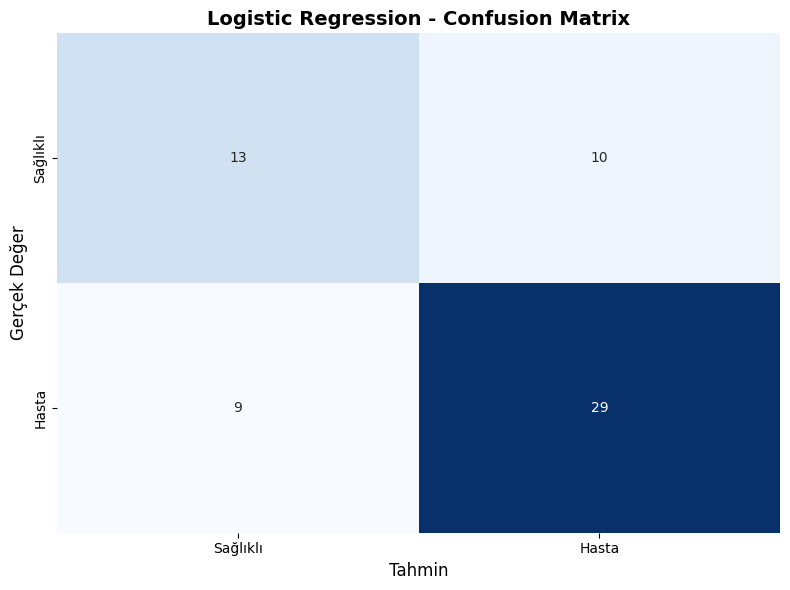


Confusion Matrix Detayları:
  True Negatives (TN):  13
  False Positives (FP): 10
  False Negatives (FN): 9
  True Positives (TP):  29


In [5]:
# Confusion Matrix
y_pred = lr_model.predict(X_test_scaled)
plot_confusion_matrix(y_test, y_pred, model_name="Logistic Regression")


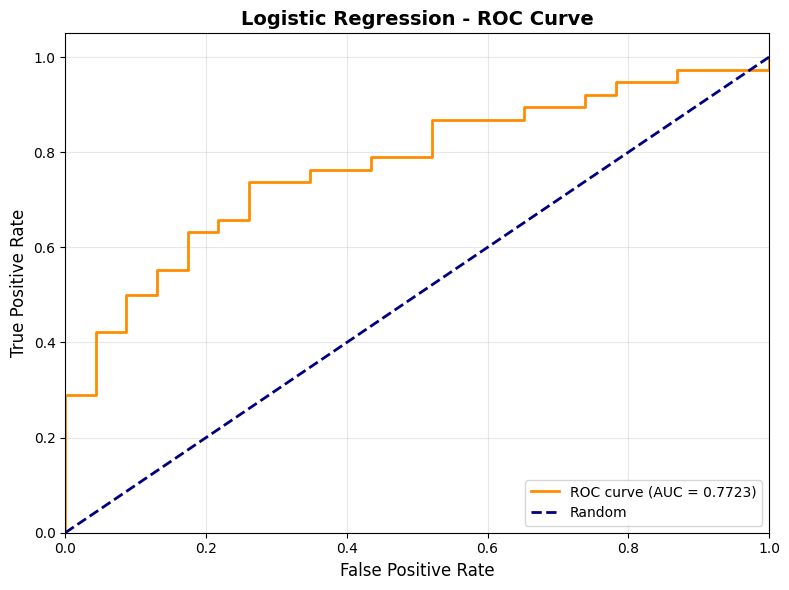

In [6]:
# ROC Curve
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_proba, model_name="Logistic Regression")


## 4. Cross Validation


In [7]:
# Cross Validation
cv_scores = cross_validate_model(lr_model, X_train_scaled, y_train, cv=5, 
                                 scoring='accuracy', model_name="Logistic Regression")



Logistic Regression - 5-Fold Cross Validation yapılıyor...

Cross Validation Sonuçları:
  Skorlar: [0.75510204 0.67346939 0.75       0.79166667 0.64583333]
  Ortalama: 0.7232
  Standart Sapma: 0.0546


## 5. Hiperparametre Optimizasyonu


In [8]:
# Parametre grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV ile hiperparametre optimizasyonu
best_lr_model, best_params = tune_hyperparameters(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid, X_train_scaled, y_train, cv=5, 
    scoring='accuracy', model_name="Logistic Regression"
)



Logistic Regression - HİPERPARAMETRE OPTİMİZASYONU
Toplam 3 parametre test edilecek...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✓ Optimizasyon tamamlandı!

En İyi Parametreler:
  C: 0.1
  penalty: l2
  solver: saga

En İyi Accuracy Skoru: 0.7440


In [9]:
# En iyi modeli değerlendir
best_lr_results = evaluate_model(best_lr_model, X_train_scaled, X_test_scaled, y_train, y_test,
                                 model_name="Logistic Regression (Optimized)")



Logistic Regression (Optimized) PERFORMANS METRİKLERİ

Metrik               Eğitim          Test           
------------------------------------------------------------
Accuracy             0.7603           0.6721
Precision            0.7901           0.7250
Recall               0.8421           0.7632
F1-Score             0.8153           0.7436
ROC-AUC              0.8458           0.7654


## 6. Model Kaydetme


In [10]:
# En iyi modeli kaydet
save_model(best_lr_model, 'logistic_regression_model.pkl')

# Sonuçları kaydet
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (Optimized)'],
    'Test Accuracy': [lr_results['test_accuracy'], best_lr_results['test_accuracy']],
    'Test Precision': [lr_results['test_precision'], best_lr_results['test_precision']],
    'Test Recall': [lr_results['test_recall'], best_lr_results['test_recall']],
    'Test F1': [lr_results['test_f1'], best_lr_results['test_f1']],
    'Test ROC-AUC': [lr_results['test_roc_auc'], best_lr_results['test_roc_auc']]
})

print("\n📊 Sonuç Özeti:")
print(results_df.to_string(index=False))


✓ Model kaydedildi: ../models\logistic_regression_model.pkl

📊 Sonuç Özeti:
                          Model  Test Accuracy  Test Precision  Test Recall  Test F1  Test ROC-AUC
            Logistic Regression       0.688525         0.74359     0.763158 0.753247      0.772311
Logistic Regression (Optimized)       0.672131         0.72500     0.763158 0.743590      0.765446


## 📝 Sonuçlar

**Logistic Regression**, kalp hastalığı tahmini için basit ama etkili bir model sunmaktadır.

### ✅ Avantajlar:
- Hızlı eğitim süresi
- Yorumlanabilir sonuçlar
- İyi genelleme yeteneği
- Düşük hesaplama maliyeti

### ⚠️ Dezavantajlar:
- Doğrusal ilişkileri varsayar
- Karmaşık ilişkileri yakalayamayabilir
- Feature engineering gerektirebilir
